In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# new_file_path = '/Users/ouyangkaifan/Desktop/Merged_Sorted_Data_Herd_Daily.xlsx'
new_file_path = r"C:\Users\61468\Desktop\Merged_Sorted_Data_Herd_Daily.xlsx"

# load Excel data
new_df = pd.read_excel(new_file_path, sheet_name='Sheet1', engine='openpyxl')


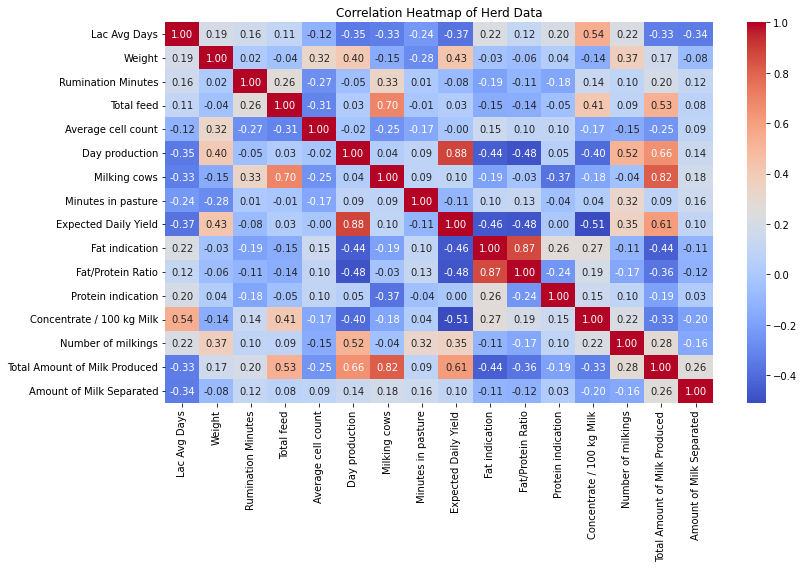

In [34]:
df1 = new_df.drop(columns=['Herd Name'])

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Herd Data')
plt.tight_layout()
plt.show()

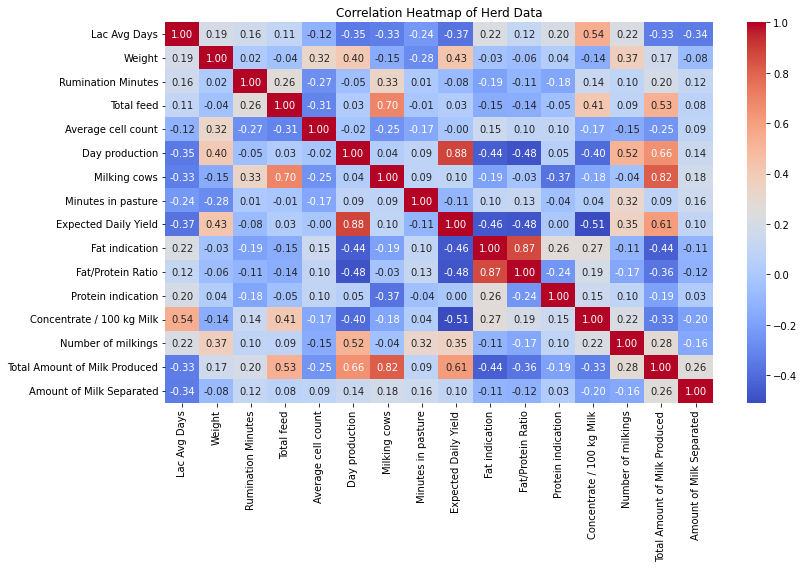

In [35]:
# 去掉非数值列，专注于数值型数据
nessary_df = new_df.drop(columns=['Herd Name', 'Lactose indication'])

# 计算相关性矩阵
corr_matrix = nessary_df.corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Herd Data')
plt.tight_layout()
plt.show()

Create three visualizations:
    1. Change in daily production volume over time.
    2. Change in fat/protein ratio over time.
    3. Change in total milk production over time.

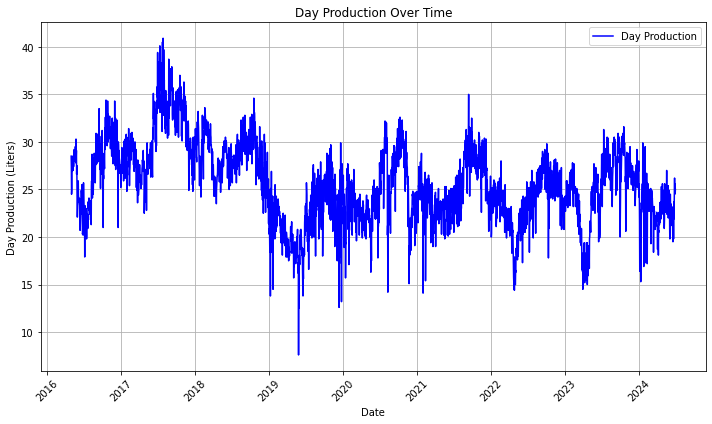

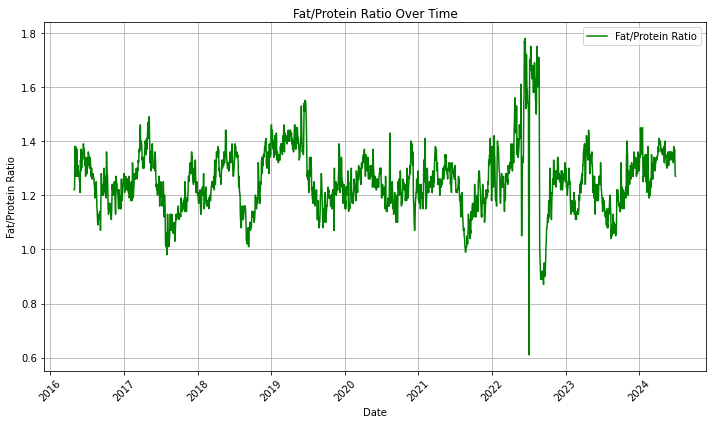

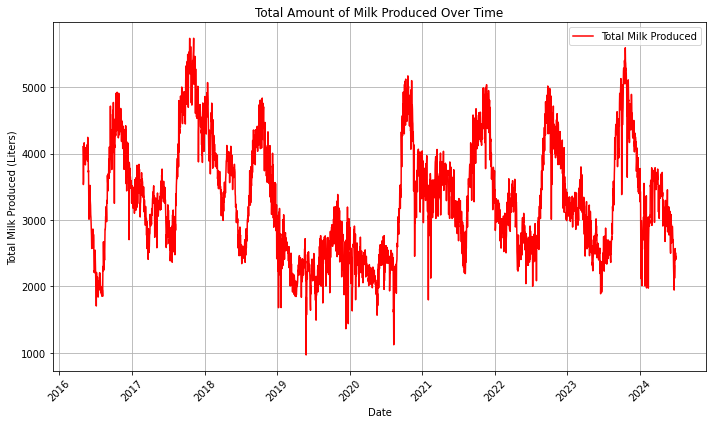

In [36]:

# 可视化1: 日生产量随时间的变化
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(new_df['Date']), new_df['Day production'], label='Day Production', color='blue')
plt.xlabel('Date')
plt.ylabel('Day Production (Liters)')
plt.title('Day Production Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 可视化2: 脂肪/蛋白比例随时间的变化
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(new_df['Date']), new_df['Fat/Protein Ratio'], label='Fat/Protein Ratio', color='green')
plt.xlabel('Date')
plt.ylabel('Fat/Protein Ratio')
plt.title('Fat/Protein Ratio Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 可视化3: 牛奶总产量随时间的变化
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(new_df['Date']), new_df['Total Amount of Milk Produced'], label='Total Milk Produced', color='red')
plt.xlabel('Date')
plt.ylabel('Total Milk Produced (Liters)')
plt.title('Total Amount of Milk Produced Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



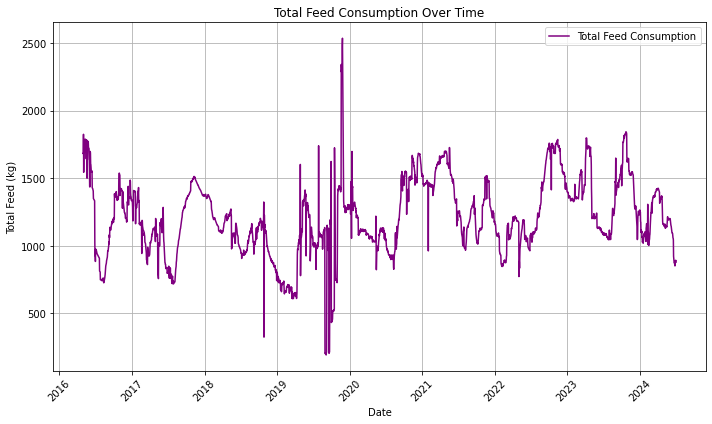

In [37]:
# Visualization: Total Feed consumption over time

# Check if 'Total feed' column has valid data
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(new_df['Date']), new_df['Total feed'], label='Total Feed Consumption', color='purple')
plt.xlabel('Date')
plt.ylabel('Total Feed (kg)')
plt.title('Total Feed Consumption Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


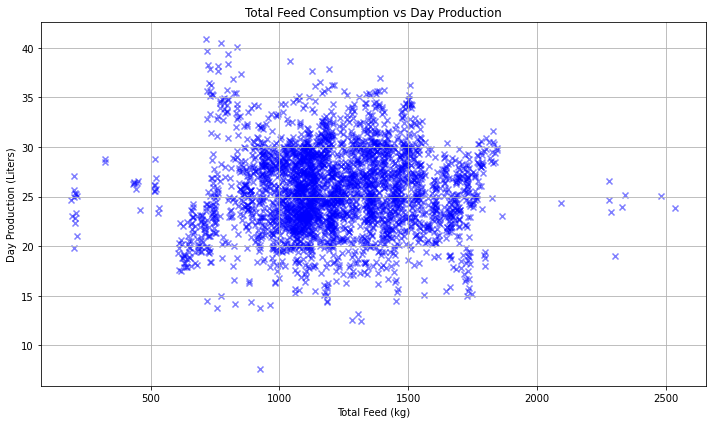

In [38]:
# 散点图: 饲料消耗与日生产量的相关性
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total feed'], new_df['Day production'], alpha=0.5, color='blue', marker='x')
plt.xlabel('Total Feed (kg)')
plt.ylabel('Day Production (Liters)')
plt.title('Total Feed Consumption vs Day Production')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Overall Trends:
The scatter distribution is relatively scattered, and does not show an obvious linear trend. This suggests that there is no simple linear relationship between feed consumption and daily milk production in this dataset.
On some days, even though feed consumption is high, milk production does not increase significantly, and vice versa. This suggests that milk production may also be affected by other factors such as cow health, weather, farm management, etc.

2. Relationship between feed consumption and milk production:
The scatter plot shows that when feed consumption is high, milk production sometimes increases disproportionately. This may mean that feed consumption is not the only factor that determines milk production, and that there may be other external factors (e.g. rumination time, weather, health, etc.) at play.

3. Possible distribution intervals:
In the case of moderate feed consumption, the range of fluctuations in milk production is relatively large. This indicates that milk production can vary greatly under the condition of more average feed consumption.
Extremely high or very low feed consumption does not lead to extreme variations in milk production, meaning that there may be an optimal range of feed consumption.

4. Boundaries of feed consumption:
As you can see from the graph, there is an upper and lower limit for feed consumption. This may be related to the size of the herd and the daily feed distribution strategy.
Conclusion:
The scatter plot showed that there was no significant linear correlation between feed consumption and milk production. Therefore, in addition to feed consumption, other factors such as weather, cattle health, rumination time, etc., may affect yield. For a deeper understanding, further analysis of other variables may be required.

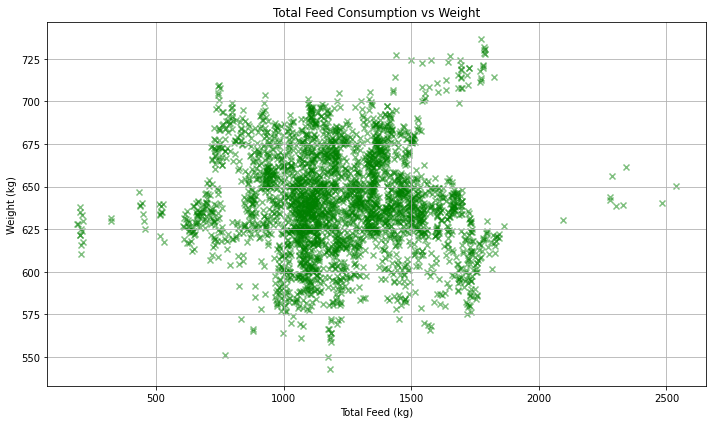

-0.03915923277551069

In [39]:
# Scatter plot and correlation between Total Feed and Weight

# Scatter plot: Total Feed vs Weight
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total feed'], new_df['Weight'], alpha=0.5, color='green', marker='x')
plt.xlabel('Total Feed (kg)')
plt.ylabel('Weight (kg)')
plt.title('Total Feed Consumption vs Weight')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between Total Feed and Weight
correlation = new_df[['Total feed', 'Weight']].corr().iloc[0, 1]
correlation

Using scatter plots and correlation analysis, the correlation coefficient between feed consumption and body weight was -0.039. This suggests that there is little significant linear correlation between them, and that the relationship is very weak and negative. This means that there is no clear trend between the weight of the cattle and the amount of feed consumed, i.e. the change in the weight of the cattle has little effect on the feed consumption.

The scatter plot also shows that the distribution of data points is scattered, indicating that there is no clear linear pattern between the two variables. There may be other factors that affect feed consumption, not just weight.

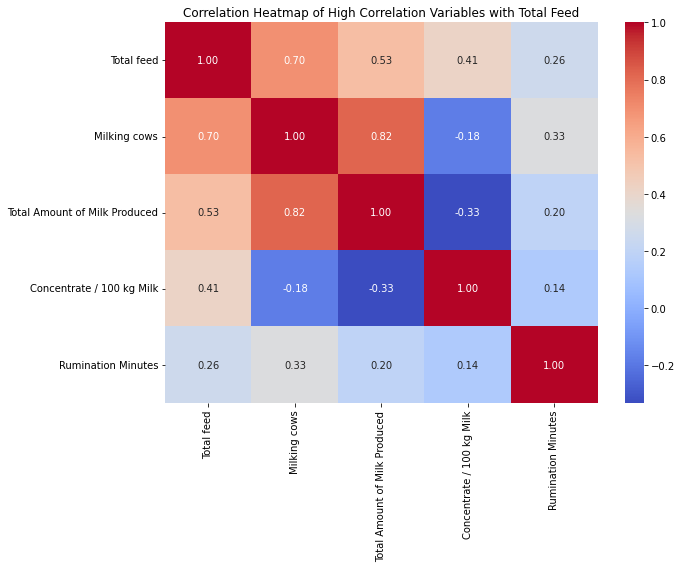

In [40]:
# Creating a heatmap for the high correlation variables with Total Feed

# Selecting top correlated variables
high_corr_columns = ['Total feed', 'Milking cows', 'Total Amount of Milk Produced', 'Concentrate / 100 kg Milk', 'Rumination Minutes']

# Creating correlation matrix for these variables
high_corr_matrix = new_df[high_corr_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of High Correlation Variables with Total Feed')
plt.tight_layout()
plt.show()


1. Milking cows: The correlation coefficient is 0.697
Explanation: This is a significant positive correlation, indicating a strong relationship between feed consumption and the number of milked cows. As the number of milked cows increases, feed consumption naturally increases. This correlation is plausible, as the more cows are milked, the greater the feed demand.

Further analysis: This shows that the feed management of dairy cows is highly dependent on the number of milking cows. Further analysis could explore whether there are significant differences in feed efficiency between milking herds of different sizes.    It can't be done

2. Total Amount of Milk Produced: The correlation coefficient is 0.531
Explanation: There was a moderate positive correlation between total milk production and feed consumption, indicating that total milk production also increased to a certain extent with the increase of feed consumption. This makes sense, more feed can support higher milk yield.

Further analysis: It is important to look at whether milk production increases proportionally, or whether there is a feed consumption threshold above which the growth rate of milk production decreases. With this type of analysis, feed management strategies can be optimized.    Try it

3. Concentrate / 100 kg Milk: The correlation coefficient is 0.413
Explanation: This variable had a moderate positive correlation with feed consumption, suggesting that the concentrate portion of the feed may have an impact on feed consumption. A higher concentrate ratio may increase overall feed consumption.     

Further analysis: Further analysis can explore the proportion of concentrate used in different feed schemes and its impact on milk production. Through these analyses, feed ratios can be optimized and unnecessary feed waste can be reduced.

4. Rumination Minutes: The correlation coefficient is 0.258
Explanation: There was a weak positive correlation between rumination time and feed consumption, indicating that the longer the rumination time, the higher the feed consumption. This may be related to the digestive efficiency and health of the cattle.

Further analysis: Rumination time can be analysed in relation to variables such as milk production and health status to see if feed consumption changes with rumination time, so as to optimize the management of feed and herd health.

Whether the relationship between Total Amount of Milk Produced and Total feed increases proportionally, and whether there is a feed consumption threshold, we can perform the following steps:

Analytical Steps:
Regression analysis:
Through linear regression analysis, it is possible to quantify the linear relationship between total milk production and feed consumption, and see if milk production increases proportionally as feed consumption increases.

Quadratic regression or piecewise regression:
Using quadratic regression analysis, it is possible to check whether the growth rate of milk production begins to decline (i.e. the response of milk production to feed gradually decreases) when feed consumption reaches a certain threshold.

Visualize the regression results:
Draw a regression curve, overlay a scatter plot, and judge whether there is a threshold for feed consumption through the shape of the curve.

In [41]:
# Dropping rows with NaN values for a cleaner analysis
df_clean = new_df[['Total feed', 'Total Amount of Milk Produced']].dropna()

# Variables for analysis
X = df_clean['Total feed'].values.reshape(-1, 1)
y = df_clean['Total Amount of Milk Produced'].values

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# 2. Polynomial (Quadratic) Regression for non-linear relationship
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

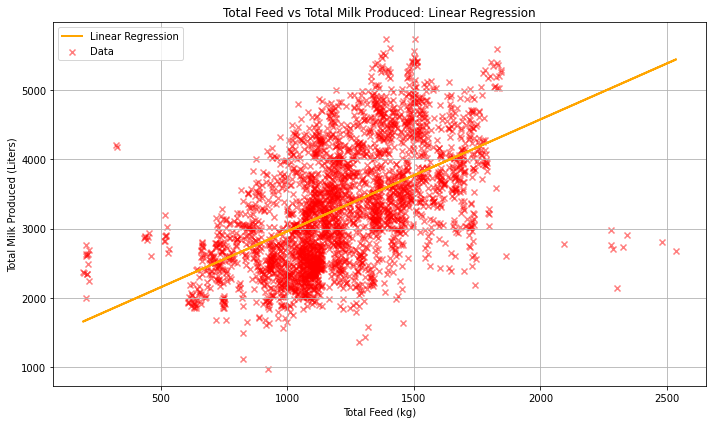

In [42]:
# 1. Plotting Linear Regression separately
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, color='red', label='Data', marker='x')
plt.plot(X, y_pred_linear, color='orange', label='Linear Regression', linewidth=2)
plt.xlabel('Total Feed (kg)')
plt.ylabel('Total Milk Produced (Liters)')
plt.title('Total Feed vs Total Milk Produced: Linear Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


This straight line shows the linear relationship between total milk production and feed consumption. While total milk production increases with increased feed consumption, as can be seen from the graph, the linear regression model does not capture all the changes in the data very well.

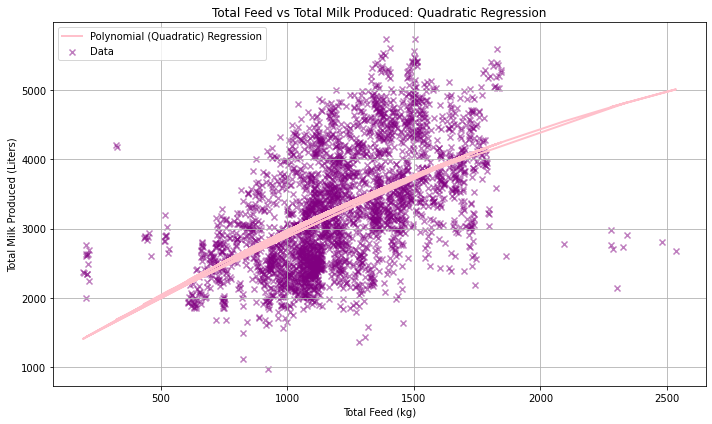

In [43]:
# 2. Plotting Polynomial (Quadratic) Regression separately
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, color='purple', label='Data', marker='x')
plt.plot(X, y_pred_poly, color='pink', label='Polynomial (Quadratic) Regression', linewidth=2)
plt.xlabel('Total Feed (kg)')
plt.ylabel('Total Milk Produced (Liters)')
plt.title('Total Feed vs Total Milk Produced: Quadratic Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The quadratic regression curve was able to better fit the data, showing a non-linear pattern of growth. As feed consumption increases, milk production does not increase proportionally all the time, but after a certain point, the rate of growth begins to slow down. This suggests that there may be a feed consumption threshold beyond which the effect of increasing milk production is weakened.

To identify the optimal threshold for feed consumption (i.e., after that point, the marginal benefit of increasing feed input on milk production diminishes), we can apply the following approach:

1. Determine the zero point by the derivative of quadratic regression:
The derivative of the quadratic regression model represents the growth rate of milk production. By finding the point where the derivative is zero, it is possible to determine the feed consumption threshold with a zero growth rate. This point corresponds to where milk production begins to slow down.

2. Maximise milk production:
We can use the quadratic regression model to find the feed consumption corresponding to the maximum milk production, even at the point where the quadratic function reaches the extreme. This point can be calculated by the formula of a quadratic function.

How to calculate the feed consumption threshold:
According to the quadratic regression model $$ y = ax^2 + bx + c $$ 
Its derivative is：$$ \frac{dy}{dx} = 2ax + b $$ 
To find the point where the growth rate is zero, Let$$ 2ax + b = 0 $$
Thus, the optimal threshold for feed consumption is as follows:

$$ x = -\frac{b}{2a} $$


A quadratic regression model was used to analyze the relationship between feed consumption and milk production, and derivative calculations were used to find the optimal threshold for feed consumption.

Coefficient a (quadratic term): -0.0002591596837366872
Coefficient b (linear term): 2.2458106269687503
Intercept: 982.9924745380172
Optimal Feed Threshold: 4332.87 kg


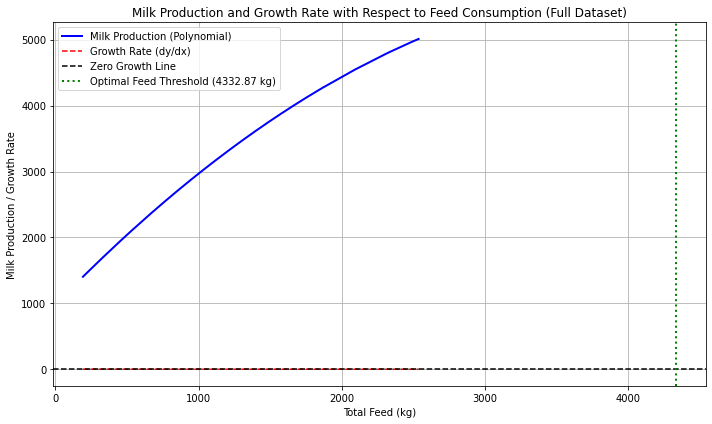

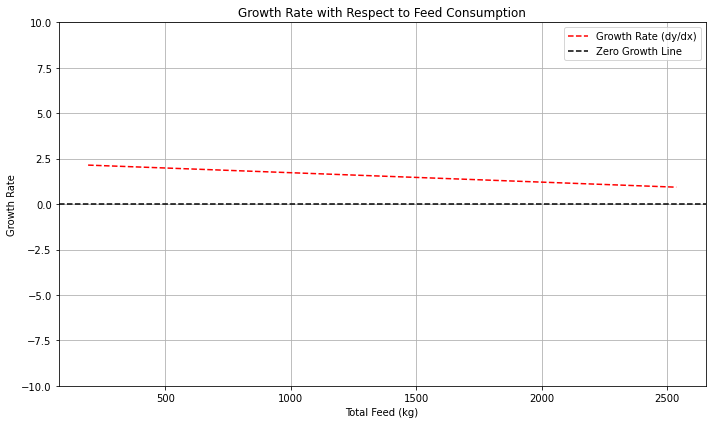

In [44]:
# Load and validate data
X_full = df_clean['Total feed'].values.reshape(-1, 1)
y_full = df_clean['Total Amount of Milk Produced'].values

# Check for missing values in the data
if np.isnan(X_full).any() or np.isnan(y_full).any():
    raise ValueError("There are missing values in the data. Please clean the data before proceeding.")

# Perform polynomial (quadratic) regression fitting
poly = PolynomialFeatures(degree=2)
X_poly_full = poly.fit_transform(X_full)
poly_model_full = LinearRegression()
poly_model_full.fit(X_poly_full, y_full)

# Extract regression coefficients
coefficients_full = poly_model_full.coef_
intercept_full = poly_model_full.intercept_

# Quadratic equation form: y = ax^2 + bx + c
a_full = coefficients_full[2]
b_full = coefficients_full[1]

# Output coefficients for review and understanding
print(f"Coefficient a (quadratic term): {a_full}")
print(f"Coefficient b (linear term): {b_full}")
print(f"Intercept: {intercept_full}")

# Calculate growth rate (derivative: dy/dx = 2ax + b)
growth_rate_full = 2 * a_full * X_full + b_full

# Sort the feed consumption data and predict milk production
X_sorted_full = np.sort(X_full, axis=0)
y_pred_poly_full = poly_model_full.predict(poly.fit_transform(X_sorted_full))

### First plot: Show milk production, growth rate, zero growth line, and optimal feed threshold ###
plt.figure(figsize=(10, 6))
plt.plot(X_sorted_full, y_pred_poly_full, label='Milk Production (Polynomial)', color='blue', linewidth=2)
plt.plot(X_sorted_full, 2 * a_full * X_sorted_full + b_full, label='Growth Rate (dy/dx)', color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')

# Calculate and plot the optimal feed threshold
if a_full != 0:  # Prevent division by zero when a = 0
    optimal_feed_threshold_full = -b_full / (2 * a_full)
    plt.axvline(optimal_feed_threshold_full, color='green', linestyle=':', label=f'Optimal Feed Threshold ({optimal_feed_threshold_full:.2f} kg)', linewidth=2)
    print(f"Optimal Feed Threshold: {optimal_feed_threshold_full:.2f} kg")
else:
    print("Unable to calculate the optimal feed threshold because a=0.")

# Add chart information
plt.xlabel('Total Feed (kg)')
plt.ylabel('Milk Production / Growth Rate')
plt.title('Milk Production and Growth Rate with Respect to Feed Consumption (Full Dataset)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Second plot: Only show growth rate and zero growth line ###
plt.figure(figsize=(10, 6))
plt.plot(X_sorted_full, 2 * a_full * X_sorted_full + b_full, label='Growth Rate (dy/dx)', color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')

# Set y-axis limits to better display growth rate
plt.ylim(-10, 10)

# Add chart information
plt.xlabel('Total Feed (kg)')
plt.ylabel('Growth Rate')
plt.title('Growth Rate with Respect to Feed Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# Compute the R² score for the polynomial (quadratic) regression model
r2_score_poly = r2_score(y, y_pred_poly)

# Display the R² score for reference
print(f"R² Score (Quadratic Regression): {r2_score_poly:.2f}")

R² Score (Quadratic Regression): 0.28


As can be seen from the graph, the red growth curve still almost coincides with the zero growth line, indicating that the impact of the increase in feed consumption on milk production is very weak under this model. Even though the model shows the existence of an optimal feed consumption threshold (4332.87 kg), the graph shows that the growth rate is always close to zero.

There are several reasons for this:

1. Poor model fit:
Quadratic term coefficients 
a is very small (close to zero), resulting in a weak description of nonlinear relationships in the regression model. As a result, the growth rate (derivative) did not change significantly over the entire feed consumption range.
2. The actual relationship of the data may be linear:
The data itself may not have a significant quadratic relationship, so a quadratic regression model may not be the best choice. It is possible that in such datasets, the relationship between feed consumption and milk production is more nearly linear.
3. Optimization Steps:
Try fitting with a linear regression model to see if you can get a more expected change in growth rate.
Alternatively, use higher-order polynomial regression models, such as cubic and quadruple regressions, to capture more complex nonlinear relationships.

Test one:

Try a linear regression model to see if the growth rate would be more reasonable. Replace PolynomialFeatures(degree=2) in the code with a linear regression model that doesn't use quadratic terms

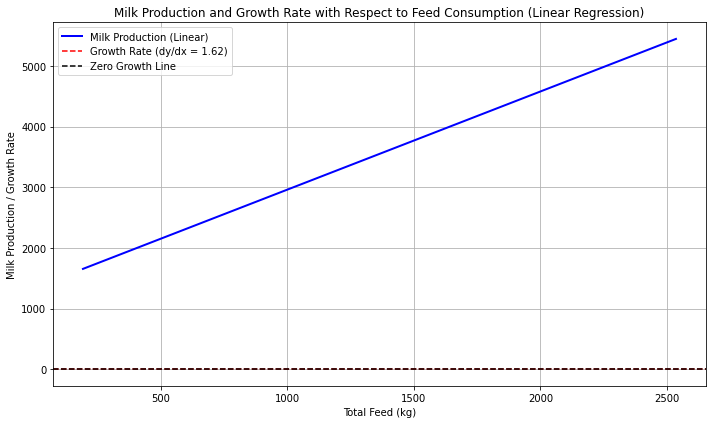

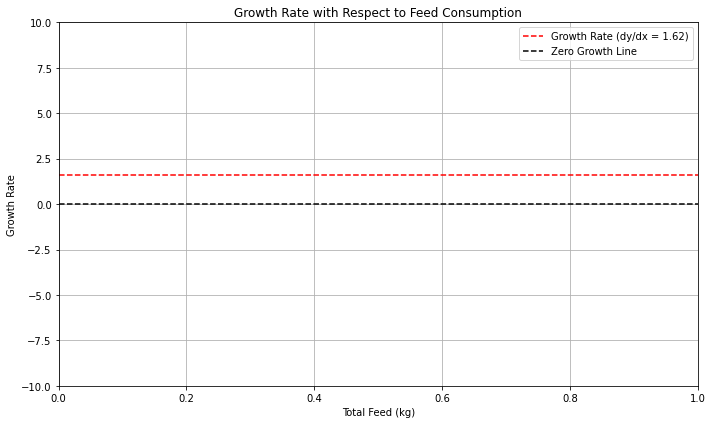

In [46]:
# 线性回归模型
poly_model_full = LinearRegression()
poly_model_full.fit(X_full, y_full)

# 提取系数
coefficients_full = poly_model_full.coef_
intercept_full = poly_model_full.intercept_

# 计算线性回归模型的预测值
y_pred_linear_full = poly_model_full.predict(X_sorted_full)

# 第一份图像：展示三条线（牛奶产量、增长率、零增长线）
plt.figure(figsize=(10, 6))
plt.plot(X_sorted_full, y_pred_linear_full, label='Milk Production (Linear)', color='blue', linewidth=2)
plt.axhline(y=coefficients_full[0], color='red', linestyle='--', label=f'Growth Rate (dy/dx = {coefficients_full[0]:.2f})')
plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')
plt.xlabel('Total Feed (kg)')
plt.ylabel('Milk Production / Growth Rate')
plt.title('Milk Production and Growth Rate with Respect to Feed Consumption (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 第二份图像：仅展示红色增长率线和黑色零增长线
plt.figure(figsize=(10, 6))
plt.axhline(y=coefficients_full[0], color='red', linestyle='--', label=f'Growth Rate (dy/dx = {coefficients_full[0]:.2f})')
plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')
plt.ylim(-10, 10)  # 设置适合展示增长率的 y 轴范围
plt.xlabel('Total Feed (kg)')
plt.ylabel('Growth Rate')
plt.title('Growth Rate with Respect to Feed Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Single regression: In a linear regression model, you get a constant growth rate, indicating that the effect of feed consumption on milk production is linear. However, in practice, there is often diminishing marginal returns in agricultural production, which may mean that linear regression is not enough to accurately describe this phenomenon.
Quadratic regression: In the quadratic regression model, a declining growth rate, and although it changes less, it captures the trend of a gradual slowdown in the growth rate of milk production as feed consumption increases. The optimal feed threshold (about 4332 kg) also helps to find a reasonable balance of feed consumption.

Test 2:

cubic (third-degree) regression

Coefficient for x^3: -1.9108750288765464e-06
Coefficient for x^2: 0.006738618092643955
Coefficient for x: -5.7329620653434405
Intercept: 3772.819709676676
Cubic regression thresholds (feed consumption): [1793.31043059  557.66071817]

Milk production predictions (Cubic Regression):
Feed consumption: 1000 kg, Predicted milk production: 2867.60 liters
Feed consumption: 1500 kg, Predicted milk production: 3886.06 liters
Feed consumption: 2000 kg, Predicted milk production: 3974.37 liters
Feed consumption: 2500 kg, Predicted milk production: 1699.36 liters


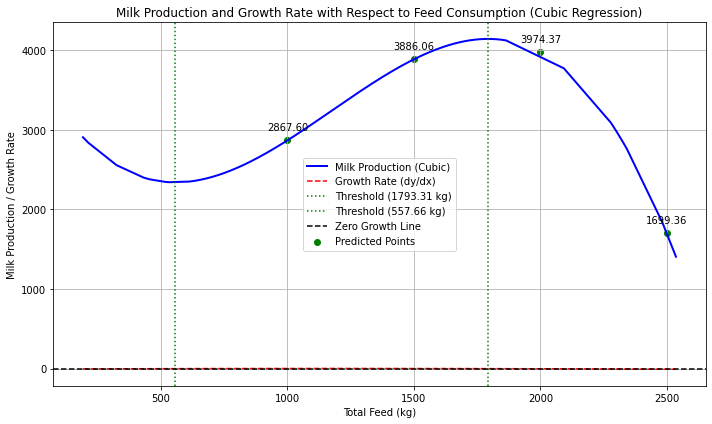

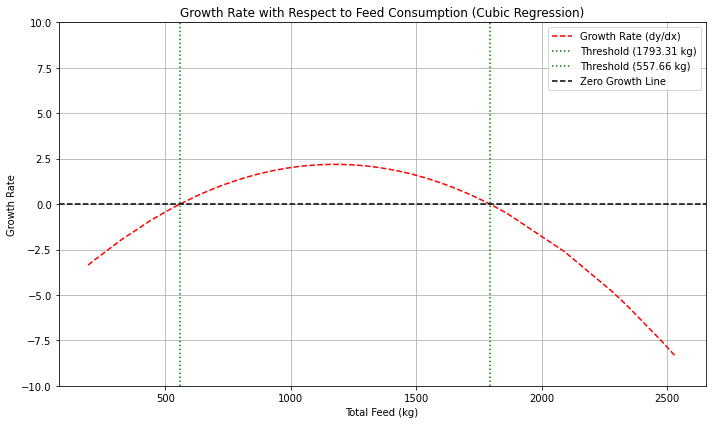

In [47]:
# Perform cubic polynomial regression fitting
poly_cubic = PolynomialFeatures(degree=3)
X_poly_cubic = poly_cubic.fit_transform(X_full)
cubic_model_full = LinearRegression()
cubic_model_full.fit(X_poly_cubic, y_full)

# Extract cubic regression coefficients
coefficients_cubic = cubic_model_full.coef_
intercept_cubic = cubic_model_full.intercept_

# Output cubic regression coefficients for better understanding
print(f"Coefficient for x^3: {coefficients_cubic[3]}")
print(f"Coefficient for x^2: {coefficients_cubic[2]}")
print(f"Coefficient for x: {coefficients_cubic[1]}")
print(f"Intercept: {intercept_cubic}")

# Predict milk production using the cubic model
y_pred_cubic_full = cubic_model_full.predict(poly_cubic.fit_transform(X_sorted_full))

# Calculate growth rate (derivative: dy/dx = 3ax^2 + 2bx + c)
a_cubic = coefficients_cubic[3]
b_cubic = coefficients_cubic[2]
c_cubic = coefficients_cubic[1]
growth_rate_cubic_full = 3 * a_cubic * (X_full ** 2) + 2 * b_cubic * X_full + c_cubic

# Calculate the cubic regression threshold (feed consumption where growth rate is zero)
cubic_thresholds = np.roots([3*a_cubic, 2*b_cubic, c_cubic])
valid_thresholds = cubic_thresholds[np.isreal(cubic_thresholds)]  # Keep only real solutions
valid_thresholds = np.real(valid_thresholds)  # Convert complex solutions to real numbers

# Print cubic regression thresholds
print(f"Cubic regression thresholds (feed consumption): {valid_thresholds}")

# New feed consumption data
new_feed_data = np.array([[1000], [1500], [2000], [2500]])  # Assuming these are new feed consumption values

# Predict milk production using the cubic regression model
new_feed_poly_cubic = poly_cubic.transform(new_feed_data)
milk_prediction_cubic = cubic_model_full.predict(new_feed_poly_cubic)

# Print new feed consumption values and corresponding milk production predictions
print("\nMilk production predictions (Cubic Regression):")
for feed, milk in zip(new_feed_data, milk_prediction_cubic):
    print(f"Feed consumption: {feed[0]} kg, Predicted milk production: {milk:.2f} liters")

# Plot cubic regression results, including new data points for predictions
plt.figure(figsize=(10, 6))
plt.plot(X_sorted_full, y_pred_cubic_full, label='Milk Production (Cubic)', color='blue', linewidth=2)
plt.plot(X_sorted_full, 3 * a_cubic * (X_sorted_full ** 2) + 2 * b_cubic * X_sorted_full + c_cubic, 
         label='Growth Rate (dy/dx)', color='red', linestyle='--')

# Highlight the new data points and their predicted values
plt.scatter(new_feed_data, milk_prediction_cubic, color='green', label='Predicted Points', marker='o')
for i, txt in enumerate(milk_prediction_cubic):
    plt.annotate(f'{txt:.2f}', (new_feed_data[i], milk_prediction_cubic[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Mark the cubic regression thresholds on the plot
for threshold in valid_thresholds:
    plt.axvline(threshold, color='green', linestyle=':', label=f'Threshold ({threshold:.2f} kg)')

plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')

# Add chart information
plt.xlabel('Total Feed (kg)')
plt.ylabel('Milk Production / Growth Rate')
plt.title('Milk Production and Growth Rate with Respect to Feed Consumption (Cubic Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Second figure: Show only the growth rate and zero growth line
plt.figure(figsize=(10, 6))
plt.plot(X_sorted_full, 3 * a_cubic * (X_sorted_full ** 2) + 2 * b_cubic * X_sorted_full + c_cubic, 
         label='Growth Rate (dy/dx)', color='red', linestyle='--')

# Mark the cubic regression thresholds on the second plot
for threshold in valid_thresholds:
    plt.axvline(threshold, color='green', linestyle=':', label=f'Threshold ({threshold:.2f} kg)')

plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')

# Set y-axis limits to better display the growth rate
plt.ylim(-10, 10)
plt.xlabel('Total Feed (kg)')
plt.ylabel('Growth Rate')
plt.title('Growth Rate with Respect to Feed Consumption (Cubic Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Do you use triple regression?
Advantages: The cubic regression model captures fluctuations in the data better than the first and second regressions, which is valuable for finding the right feed dosage.
Risk: There is a risk that cubic regression will be overfitted, especially when the amount of data is small, and it may capture noise rather than actual trends. Therefore, it is necessary to evaluate whether the data is sufficient to support such a complex model.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 将数据集拆分为训练集和测试集（80% 训练，20% 测试）
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# 进行三次多项式回归拟合
poly_cubic = PolynomialFeatures(degree=3)
X_poly_train_cubic = poly_cubic.fit_transform(X_train)
X_poly_test_cubic = poly_cubic.transform(X_test)

cubic_model = LinearRegression()
cubic_model.fit(X_poly_train_cubic, y_train)

# 预测训练集和测试集的结果
y_train_pred_cubic = cubic_model.predict(X_poly_train_cubic)
y_test_pred_cubic = cubic_model.predict(X_poly_test_cubic)

# 计算训练集和测试集的 R² 值
r2_train_cubic = r2_score(y_train, y_train_pred_cubic)
r2_test_cubic = r2_score(y_test, y_test_pred_cubic)

# 计算训练集和测试集的 MSE（均方误差）
mse_train_cubic = mean_squared_error(y_train, y_train_pred_cubic)
mse_test_cubic = mean_squared_error(y_test, y_test_pred_cubic)

# 输出 R² 和 MSE
print(f"Train R² (Cubic Regression): {r2_train_cubic:.2f}")
print(f"Test R² (Cubic Regression): {r2_test_cubic:.2f}")
print(f"Train MSE (Cubic Regression): {mse_train_cubic:.2f}")
print(f"Test MSE (Cubic Regression): {mse_test_cubic:.2f}")


Train R² (Cubic Regression): 0.32
Test R² (Cubic Regression): 0.35
Train MSE (Cubic Regression): 490940.38
Test MSE (Cubic Regression): 478832.40


Conclusion:

1. No significant overfitting:
The R² and MSE of the test set are very close to those of the training set, indicating that the performance of the model on the training and test sets is not very different. Generally speaking,
If the test set performs significantly worse than the training set, there may be an overfit problem. But here, the difference is not huge, so the model does not
Significant overfitting phenomenon.

2. Weak model fitting ability:
Although there was no significant overfitting, the cubic regression model had relatively low R² values (0.32 and 0.35), indicating that the model could only explain the number
There is a variance of about 32%-35%, which indicates that the model has a weak fitting ability. This can mean the nexus between feed consumption and milk production
The system is not well described by cubic regression, or there are other key factors in the data that have not been taken into account.
However, compared to the quadratic regression of 0.28, there is some improvement

Train R² (Quartic Regression): 0.32
Test R² (Quartic Regression): 0.35
Train MSE (Quartic Regression): 490787.35
Test MSE (Quartic Regression): 478953.32


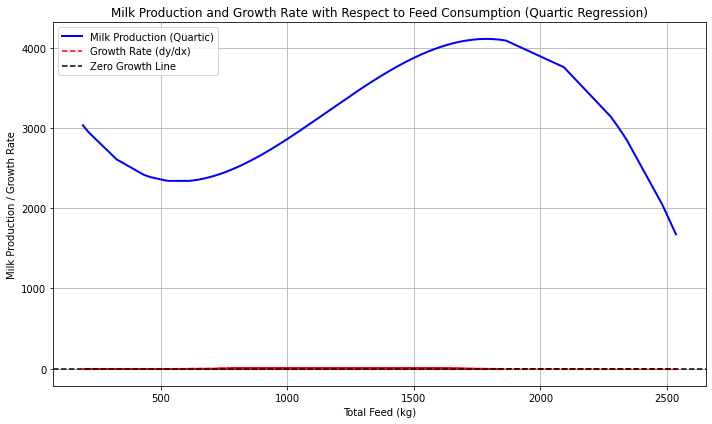

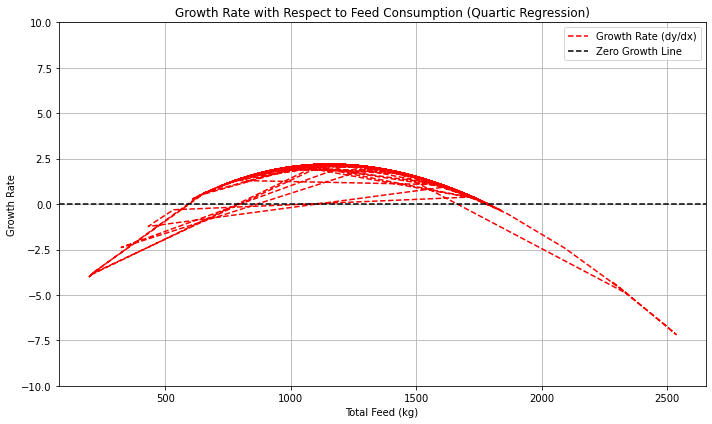

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# 1. 数据集拆分：训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# 2. 四次多项式回归模型的训练
poly_quartic = PolynomialFeatures(degree=4)
X_poly_train_quartic = poly_quartic.fit_transform(X_train)
X_poly_test_quartic = poly_quartic.transform(X_test)

quartic_model = LinearRegression()
quartic_model.fit(X_poly_train_quartic, y_train)

# 3. 预测训练集和测试集的结果
y_train_pred_quartic = quartic_model.predict(X_poly_train_quartic)
y_test_pred_quartic = quartic_model.predict(X_poly_test_quartic)

# 4. 计算训练集和测试集的 R² 值
r2_train_quartic = r2_score(y_train, y_train_pred_quartic)
r2_test_quartic = r2_score(y_test, y_test_pred_quartic)

# 5. 计算训练集和测试集的 MSE（均方误差）
mse_train_quartic = mean_squared_error(y_train, y_train_pred_quartic)
mse_test_quartic = mean_squared_error(y_test, y_test_pred_quartic)

# 6. 输出 R² 和 MSE
print(f"Train R² (Quartic Regression): {r2_train_quartic:.2f}")
print(f"Test R² (Quartic Regression): {r2_test_quartic:.2f}")
print(f"Train MSE (Quartic Regression): {mse_train_quartic:.2f}")
print(f"Test MSE (Quartic Regression): {mse_test_quartic:.2f}")

# 7. 提取四次回归的系数，用于计算增长率
coefficients_quartic = quartic_model.coef_
intercept_quartic = quartic_model.intercept_

# 8. 计算四次回归模型的增长率 (导数: dy/dx = 4ax^3 + 3bx^2 + 2cx + d)
a_quartic = coefficients_quartic[4]
b_quartic = coefficients_quartic[3]
c_quartic = coefficients_quartic[2]
d_quartic = coefficients_quartic[1]
growth_rate_quartic_full = 4 * a_quartic * (X_full ** 3) + 3 * b_quartic * (X_full ** 2) + 2 * c_quartic * X_full + d_quartic

# 9. 对完整数据集进行预测
X_sorted_full = np.sort(X_full, axis=0)
y_pred_quartic_full = quartic_model.predict(poly_quartic.fit_transform(X_sorted_full))

# 10. 绘制四次回归拟合结果和增长率曲线
plt.figure(figsize=(10, 6))
plt.plot(X_sorted_full, y_pred_quartic_full, label='Milk Production (Quartic)', color='blue', linewidth=2)
plt.plot(X_full, growth_rate_quartic_full, label='Growth Rate (dy/dx)', color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')
plt.xlabel('Total Feed (kg)')
plt.ylabel('Milk Production / Growth Rate')
plt.title('Milk Production and Growth Rate with Respect to Feed Consumption (Quartic Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. 第二个图像：仅展示增长率和零增长线
plt.figure(figsize=(10, 6))
plt.plot(X_full, growth_rate_quartic_full, label='Growth Rate (dy/dx)', color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--', label='Zero Growth Line')
plt.ylim(-10, 10)  # 设置 y 轴范围便于观察增长率
plt.xlabel('Total Feed (kg)')
plt.ylabel('Growth Rate')
plt.title('Growth Rate with Respect to Feed Consumption (Quartic Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Interpretation of results:
Train R² (Quartic Regression): 0.32
The R² of the training set is 0.32, indicating that the quadratic regression model explains about 32% of the milk yield change on the training data.
Test R² (Quartic Regression): 0.35
The test set also had an R² of 0.35, which was similar to the results of the cubic regression, indicating that the model did not perform significantly on the test data.
Train MSE (Quartic Regression): 490787.35
The training set has a mean square error (MSE) of 490,787, which is very close to the error of the cubic regression model.
Test MSE (Quartic Regression): 478953.32
The mean square error of the test set is 478,953, which is also close to the cubic regression model, indicating that the quadratic regression model does not significantly improve the accuracy of the model.
Conclusion:
There was no significant improvement in the quadratic regression model:

As a result, quadratic regression models are almost indistinguishable from cubic regression on R² and MSE. This suggests that increasing the complexity of the polynomial, such as from cubic to quadruple regression, does not result in a significant fitting improvement for the model.
It could be the linear and simple nonlinear nature of the data:

The data may not have such a complex nonlinear structure in nature, and polynomial models of three or more may not capture additional valid information.
In addition, the relationship between feed consumption and milk production may be linear or close to quadratic, and models that are too advanced may not have a greater performance improvement in this case, and may even be overfitted.
Suggested next steps:
Back to the simpler model:

Quadratic regression may be a more appropriate option, especially if higher-order models do not deliver significant improvements. Simple models are often more explanatory and avoid overfitting.

To evaluate the fitting of cubic and quadratic regressions, we can use residual analysis and visualize the performance of the model through residual plots. Residuals are the difference between the actual values and the predicted values of the model, and a good model should exhibit irregular, uniformly distributed residuals over different input values.

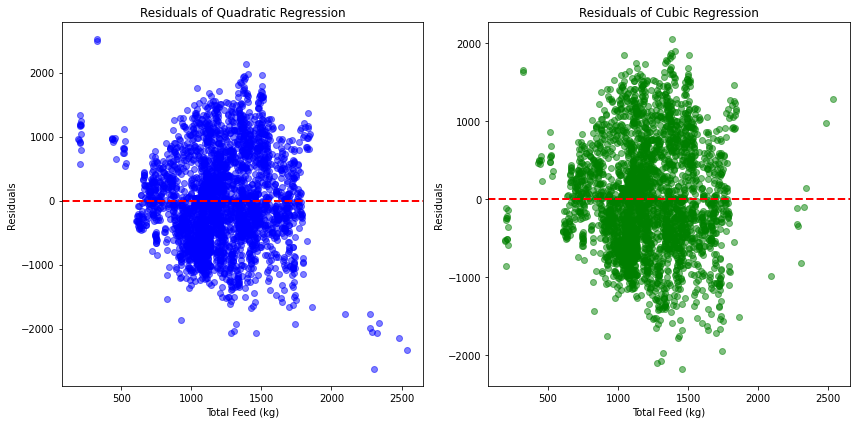

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. 二次多项式回归拟合
poly_quadratic = PolynomialFeatures(degree=2)
X_poly_quadratic = poly_quadratic.fit_transform(X_full)
quadratic_model = LinearRegression()
quadratic_model.fit(X_poly_quadratic, y_full)

# 2. 三次多项式回归拟合
poly_cubic = PolynomialFeatures(degree=3)
X_poly_cubic = poly_cubic.fit_transform(X_full)
cubic_model = LinearRegression()
cubic_model.fit(X_poly_cubic, y_full)

# 3. 预测牛奶产量
y_pred_quadratic = quadratic_model.predict(X_poly_quadratic)
y_pred_cubic = cubic_model.predict(X_poly_cubic)

# 4. 计算残差
residuals_quadratic = y_full - y_pred_quadratic
residuals_cubic = y_full - y_pred_cubic

# 5. 绘制残差图
plt.figure(figsize=(12, 6))

# 二次回归残差图
plt.subplot(1, 2, 1)
plt.scatter(X_full, residuals_quadratic, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals of Quadratic Regression')
plt.xlabel('Total Feed (kg)')
plt.ylabel('Residuals')

# 三次回归残差图
plt.subplot(1, 2, 2)
plt.scatter(X_full, residuals_cubic, color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals of Cubic Regression')
plt.xlabel('Total Feed (kg)')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


1. Randomness of the residual distribution:
The points in the residual plot should be randomly distributed above and below the zero line, and ideally should not show any particular pattern. However, it can be seen from the graph that the residuals are highly concentrated near the zero line, and there is a clear divergence trend on the left and right sides, indicating that the model may have a poor fit for some intervals.
Especially in the regions with lower feed consumption (less than 500 kg) and higher feed consumption (more than 2000 kg), there is a significant deviation in the distribution of residuals, and the model has systematic errors in the prediction of these regions.

Quadratic regression residuals plot (left):
Residual distribution: It can be seen that the residuals fluctuate more at lower and higher feed consumption, while in the middle range, the distribution of residuals is more concentrated.
Patterns: Some patterns can be seen from the graph, especially for feed consumption above 2500kg, where the residuals have decreased, which may indicate that the quadratic regression model does not capture the non-linear trends of the data well, especially at higher feed consumption.
Cubic regression residuals plot (right):
Residual distribution: The residuals of the cubic regression are more evenly distributed across different feed consumptions, especially in the middle of the feed consumption range (1000 kg to 2000 kg). Compared with quadratic regression, the quadratic regression model has less residual fluctuation and more stable performance at data points of extreme feed consumption (e.g., above 2000kg).
Pattern: Although there are some discrete points, the overall distribution of the residuals of the cubic regression model is relatively random, and there is no obvious pattern, indicating that the cubic regression may perform better than the quadratic regression when fitting the data.

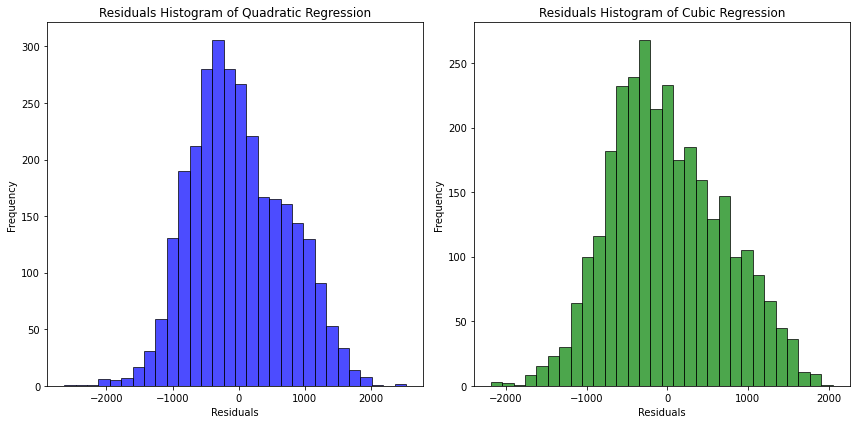

In [51]:
# 1. 二次回归拟合
poly_quadratic = PolynomialFeatures(degree=2)
X_poly_quadratic = poly_quadratic.fit_transform(X_full)
quadratic_model = LinearRegression()
quadratic_model.fit(X_poly_quadratic, y_full)

# 2. 三次回归拟合
poly_cubic = PolynomialFeatures(degree=3)
X_poly_cubic = poly_cubic.fit_transform(X_full)
cubic_model = LinearRegression()
cubic_model.fit(X_poly_cubic, y_full)

# 3. 预测值计算
y_pred_quadratic = quadratic_model.predict(X_poly_quadratic)
y_pred_cubic = cubic_model.predict(X_poly_cubic)

# 4. 计算残差
residuals_quadratic = y_full - y_pred_quadratic
residuals_cubic = y_full - y_pred_cubic

# 5. 绘制残差直方图
plt.figure(figsize=(12, 6))

# 二次回归残差直方图
plt.subplot(1, 2, 1)
plt.hist(residuals_quadratic, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.title('Residuals Histogram of Quadratic Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# 三次回归残差直方图
plt.subplot(1, 2, 2)
plt.hist(residuals_cubic, bins=30, edgecolor='black', color='green', alpha=0.7)
plt.title('Residuals Histogram of Cubic Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Residual histogram:
The residual distribution of the quadratic regression model is shown.
Near-normal distribution: As you can see from the figure, the residuals are roughly bell-shaped, indicating that the residuals are close to normal distribution, and the model fits the data well in most cases.
Symmetry: The residuals are symmetrically distributed around 0, further indicating that the quadratic regression model has no significant bias on most data points.
Extreme residuals: There are a small number of extreme residuals at −2000 and 2000, indicating that the model does not fit well in some cases.

The residuals of the quadratic regression are more concentrated in the center, but there are biases in some areas and may not perform well in the extreme (too high or too low feed consumption) sections.
The distribution of residuals in cubic regression is more symmetrical and smooth, with residuals more concentrated around 0, suggesting that the model has a slight advantage in the overall fit.


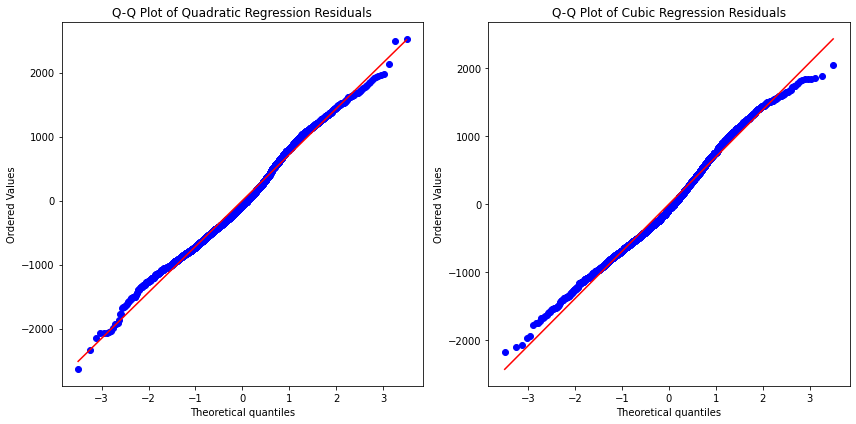

In [53]:
import scipy.stats as stats

# 1. 二次回归拟合
poly_quadratic = PolynomialFeatures(degree=2)
X_poly_quadratic = poly_quadratic.fit_transform(X_full)
quadratic_model = LinearRegression()
quadratic_model.fit(X_poly_quadratic, y_full)

# 2. 三次回归拟合
poly_cubic = PolynomialFeatures(degree=3)
X_poly_cubic = poly_cubic.fit_transform(X_full)
cubic_model = LinearRegression()
cubic_model.fit(X_poly_cubic, y_full)

# 3. 预测值计算
y_pred_quadratic = quadratic_model.predict(X_poly_quadratic)
y_pred_cubic = cubic_model.predict(X_poly_cubic)

# 4. 计算残差
residuals_quadratic = y_full - y_pred_quadratic
residuals_cubic = y_full - y_pred_cubic

# 5. 绘制Q-Q图
plt.figure(figsize=(12, 6))

# 二次回归残差的Q-Q图
plt.subplot(1, 2, 1)
stats.probplot(residuals_quadratic, dist="norm", plot=plt)
plt.title('Q-Q Plot of Quadratic Regression Residuals')

# 三次回归残差的Q-Q图
plt.subplot(1, 2, 2)
stats.probplot(residuals_cubic, dist="norm", plot=plt)
plt.title('Q-Q Plot of Cubic Regression Residuals')

plt.tight_layout()
plt.show()


Theoretically, the normally distributed residuals should be close to a diagonal line on the QQ plot.
Most of the points are close to the diagonal: As you can see from the graph, most of the data points are very close to the red diagonal, which indicates that the residuals are close to a normal distribution, indicating that the model fits well.
Points that deviate from the diagonal: There are some points at both ends of the distribution (especially the upper right and lower left corners) that deviate significantly from the diagonal, indicating that in these extreme cases, the residuals are larger. This means that in these areas, there may be some systematic errors or deficiencies in the model.

Normality: The residuals of both regression models show relatively good normality, but the residuals of cubic regression perform slightly better at the extremes than quadratic regression.
Model selection: Cubic regression may be a better choice if there are more extreme values in the data or if the nonlinear trend is more pronounced because it better maintains the normality of the residuals when dealing with extreme data.

The regression model may have a low R^2 value for several reasons, even though the residual distribution is relatively close to normal, but the model does not account for the variation in the data well:

1. The nonlinear relationship of the data is not sufficient to be explained by regression
While a regression model is able to fit a certain degree of nonlinear relationship, it may not be sufficient to capture the complexity in the data. If there are more complex patterns in the data, such as cubic or higher nonlinear relationships, regression may not be able to capture these relationships effectively, resulting in a lower R^2 score

3. There is a lot of noise or heterogeneity in the data
There may be significant noise or heterogeneity in the data, i.e., some outliers or hard-to-interpret fluctuations. These noise points can affect the overall fitting effect of the model, resulting in: 
The R^2 score was low. This can be seen in the residual plot, where some data points have large residuals.

4. Complex relationships between variables
Milk production can be affected by multiple variables, not just feed consumption. The regression model only considers the relationship between feed consumption and milk yield, and may ignore other important factors such as weather, the health of the cattle, the quality of the feed, etc. These unconsidered factors also reduce the explanatory power of the model.

6. Overfitting or underfitting
If the regression model is too simplistic (underfitted), it cannot effectively capture patterns in the data, which can also result in a lower R^2 score
 。 In the residual plots and QQ plots, although the residuals of most of the data points are close to 0, there are large systematic errors in some regions, especially high and low feed consumption, indicating that the model may not fit effectively in these regions.

8. Complexity of data distribution
Data points can be unevenly distributed, with data dense in some areas and sparse in others. The regression model may perform well in dense data regions, but may have large errors in sparse data regions, resulting in poor overall R^2 score.

Possible improvements:
Use more complex models: Higher order polynomial regression (quadratic and so on) can be tried without significant improvement Using a nonlinear model, such as random forest or decision tree, to capture more complex patterns may be better

Feature engineering: Add more relevant variables, or further process the data to remove noise and outliers.  It is difficult to define what data is noise
Regularization: If higher-order polynomial regression introduces an overfitting problem, you can control the complexity of the model with Ridge regression or Lasso regression.


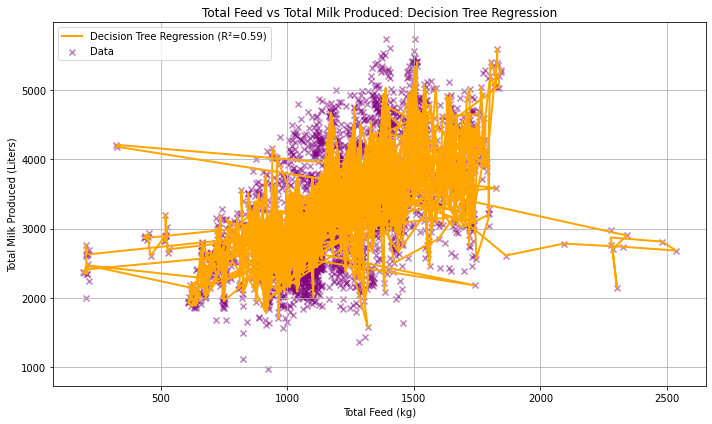

0.5875769641070383

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Apply Decision Tree Regressor to the dataset
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X, y)

# Predict using the decision tree model
y_pred_dt = dt_model.predict(X)

# Compute the R² score for the decision tree model
r2_score_dt = r2_score(y, y_pred_dt)

# Plot the decision tree regression fit with scatter points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, color='purple', label='Data', marker='x')
plt.plot(X, y_pred_dt, color='orange', label=f'Decision Tree Regression (R²={r2_score_dt:.2f})', linewidth=2)
plt.xlabel('Total Feed (kg)')
plt.ylabel('Total Milk Produced (Liters)')
plt.title('Total Feed vs Total Milk Produced: Decision Tree Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display the R² score for the decision tree model
r2_score_dt


In [55]:
# Extract the decision tree structure to find the key split points (thresholds)
thresholds = dt_model.tree_.threshold

# Extracting only valid thresholds (ignore -2, which indicates a leaf node)
valid_thresholds = thresholds[thresholds != -2]

# Display the unique split thresholds (these represent the key feed consumption points)
sorted_thresholds = np.sort(valid_thresholds)

sorted_thresholds


array([ 194.,  199.,  203., ..., 2335., 2412., 2509.])